In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [25]:
df = pd.read_csv("test-data.csv")

# unfortunately this dataset is not very useful, we cannot really predict the outcome basing on the data as it does not have any strict values like price

In [26]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,Petrol,Manual,First,32.26 kmpl,998 CC,58.2 bhp,4
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5


In [27]:
df['Power'] = df['Power'].str.replace('bhp', '')
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')
df['Engine'] = df['Engine'].str.replace('CC', '')
df = df.drop('Name', axis=1)

# removing useless elements

In [28]:
df = df[df['Power'].str.strip().str.lower() != 'null']
df = df[df['Engine'].str.strip().str.lower() != 'null']
df.head()

# removing null values

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Delhi,2014,40929,Petrol,Manual,First,32.26,998,58.2,4
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7
4,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.0,2179,140,7


In [29]:
for col in df.columns:
    # Try to convert each value in the column to numeric
    numeric_values = pd.to_numeric(df[col], errors='coerce')
    
    # Check if there are any non-numeric values after conversion
    wrong_values = df[col][pd.isna(numeric_values)]
    
    if not wrong_values.empty:
        print(f"Column '{col}' has wrong numerical data:")
        print(wrong_values)

# just checking for myself)

Column 'Location' has wrong numerical data:
0            Delhi
1       Coimbatore
2           Mumbai
4           Mumbai
5       Coimbatore
           ...    
1219     Hyderabad
1220        Mumbai
1221       Kolkata
1222          Pune
1223         Kochi
Name: Location, Length: 1202, dtype: object
Column 'Fuel_Type' has wrong numerical data:
0       Petrol
1       Petrol
2       Diesel
4       Petrol
5       Diesel
         ...  
1219    Diesel
1220    Petrol
1221    Diesel
1222    Petrol
1223    Diesel
Name: Fuel_Type, Length: 1202, dtype: object
Column 'Transmission' has wrong numerical data:
0          Manual
1          Manual
2          Manual
4          Manual
5          Manual
          ...    
1219       Manual
1220    Automatic
1221       Manual
1222    Automatic
1223    Automatic
Name: Transmission, Length: 1202, dtype: object
Column 'Owner_Type' has wrong numerical data:
0        First
1       Second
2        First
4        First
5       Second
         ...  
1219     First
122

In [30]:
df['Power'] = pd.to_numeric(df['Power'])
df['Mileage'] = pd.to_numeric(df['Mileage'])
df['Engine'] = pd.to_numeric(df['Engine'])
df.head(30)

# converting to numeric

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Delhi,2014,40929,Petrol,Manual,First,32.26,998,58.20,4
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796,47.30,5
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197,82.85,5
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179,140.00,7
6,Pune,2015,59000,Diesel,Automatic,First,12.55,2982,168.70,7
7,Jaipur,2013,65000,Petrol,Manual,First,21.10,814,55.20,5
8,Mumbai,2011,66000,Petrol,Manual,Second,17.00,1497,118.00,5
9,Coimbatore,2015,54684,Diesel,Manual,First,15.10,2179,140.00,7
10,Mumbai,2012,78000,Diesel,Automatic,Second,12.80,1968,167.60,5


In [31]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,2013.500000,57927.015807,18.271248,1597.504992,110.380420,5.288686
std,3.091244,35460.516022,4.296529,566.543338,51.543818,0.832733
min,2000.000000,1000.000000,0.000000,624.000000,34.200000,2.000000
25%,2011.000000,33511.000000,15.290000,1198.000000,75.000000,5.000000
50%,2014.000000,54000.000000,18.440000,1461.000000,93.700000,5.000000
75%,2016.000000,73893.750000,21.100000,1968.000000,130.000000,5.000000
max,2019.000000,350000.000000,32.260000,5998.000000,616.000000,10.000000


In [32]:
df['Transmission'] = df['Transmission'].replace({'Manual': 0, 'Automatic': 1})
df = df.drop('Owner_Type', axis=1)
df = df.drop('Fuel_Type', axis=1)
df = df.drop('Location', axis=1)
df = df.drop('Year', axis=1)
df.head(10)

# dropping useless columns

,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats
0,40929,0,32.26,998,58.20,4
1,54493,0,24.70,796,47.30,5
2,34000,0,13.68,2393,147.80,7
4,29000,0,18.50,1197,82.85,5
5,85609,0,16.00,2179,140.00,7
6,59000,1,12.55,2982,168.70,7
7,65000,0,21.10,814,55.20,5
8,66000,0,17.00,1497,118.00,5
9,54684,0,15.10,2179,140.00,7
10,78000,1,12.80,1968,167.60,5


In [33]:
df.columns

Index(['Kilometers_Driven', 'Transmission', 'Mileage', 'Engine', 'Power',
       'Seats'],
      dtype='object')

In [34]:
for col in df.columns:
    # Try to convert each value in the column to numeric
    numeric_values = pd.to_numeric(df[col], errors='coerce')
    
    # Check if there are any non-numeric values after conversion
    wrong_values = df[col][pd.isna(numeric_values)]
    
    if not wrong_values.empty:
        print(f"Column '{col}' has wrong numerical data:")
        print(wrong_values)

In [35]:
df.head()

,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats
0,40929,0,32.26,998,58.20,4
1,54493,0,24.70,796,47.30,5
2,34000,0,13.68,2393,147.80,7
4,29000,0,18.50,1197,82.85,5
5,85609,0,16.00,2179,140.00,7


In [36]:
df.describe()

,Kilometers_Driven,Transmission,Mileage,Engine,Power,Seats
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,57927.015807,0.268719,18.271248,1597.504992,110.380420,5.288686
std,35460.516022,0.443478,4.296529,566.543338,51.543818,0.832733
min,1000.000000,0.000000,0.000000,624.000000,34.200000,2.000000
25%,33511.000000,0.000000,15.290000,1198.000000,75.000000,5.000000
50%,54000.000000,0.000000,18.440000,1461.000000,93.700000,5.000000
75%,73893.750000,1.000000,21.100000,1968.000000,130.000000,5.000000
max,350000.000000,1.000000,32.260000,5998.000000,616.000000,10.000000


In [37]:
X = df[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']]

# have only the target variable here (dependent variable)
y = df['Transmission']

# splitting the data into training and testing sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# the model is quite accurate, 86%

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       258
           1       0.82      0.67      0.74       103

    accuracy                           0.86       361
   macro avg       0.85      0.81      0.82       361
weighted avg       0.86      0.86      0.86       361


Model overall accuracy: 86.43%


In [43]:
print(confusion_matrix(y_test, predictions))

[[243  15]
 [ 34  69]]


In [44]:
roc_auc_score(y, logmodel.predict_proba(X.values)[:, 1])

0.49870560762476357

In [45]:
tester_row = {
    'Kilometers_Driven': 60000,
    'Mileage': 32,
    'Engine': 1000,
    'Power': 100,
    'Seats': 2
}

# create a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(logmodel.predict_proba(tester_row))
print()

# change these based on your original data
labels = [
    "Manual",
    "Automatic"
]

print("Transmission:")
transmission_prediction = logmodel.predict(tester_row)
result = labels[transmission_prediction[0]]
print(result)
print("-------------------")

# the model predicts that the car is automatic, not so obvious, but considering engine and power values, it is quite possible

All probabilities by category:
[[0.31593858 0.68406142]]

Transmission:
Automatic
-------------------


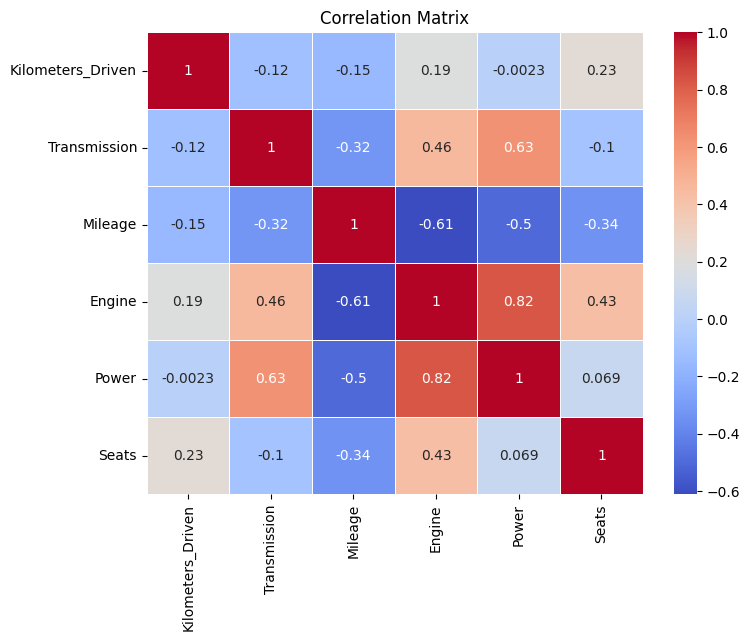

In [46]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# the correlation matrix shows that the most important factors are engine and power, which is obvious actually